Video game sales data from Kaggle: https://www.kaggle.com/gregorut/videogamesales

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
data = "vgsales.csv"

games = pd.read_csv(data)

<IPython.core.display.Javascript object>

# Exploring Dataset

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<IPython.core.display.Javascript object>

In [4]:
games.set_index("Rank")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


<IPython.core.display.Javascript object>

# Filter data

We will filter the orginal dataset to focus on EA games by genre: sports and not sports

We want to see whether EA sports games or other genres of EA games sell more units in North America.

In [5]:
ea = games[games["Publisher"] == "Electronic Arts"]

<IPython.core.display.Javascript object>

In [6]:
ea["Year"].unique()

array([2015., 2012., 2009., 2011., 2003., 2013., 2004., 2002., 2014.,
         nan, 2010., 2005., 2016., 2006., 2001., 2007., 2008., 1999.,
       1998., 2000., 1997., 1996., 1995., 1994., 1992.])

<IPython.core.display.Javascript object>

Need to account for null values.

In [7]:
print(ea.isna().sum())
na = ea[ea["Year"].isnull()]
na

Rank             0
Name             0
Platform         0
Year            12
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
1133,1135,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.00,0.22,1.62
1837,1839,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.00,0.35,1.11
3421,3423,Madden NFL 06,X360,NaN,Sports,Electronic Arts,0.54,0.00,0.01,0.03,0.59
3715,3717,Def Jam: Fight for NY,XB,NaN,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.54
3753,3755,NBA Street Vol. 2,GC,NaN,Sports,Electronic Arts,0.41,0.11,0.00,0.01,0.54
4199,4201,Tiger Woods PGA Tour 07,Wii,NaN,Sports,Electronic Arts,0.43,0.00,0.00,0.04,0.47
5162,5164,NBA Live 2003,XB,NaN,Sports,Electronic Arts,0.31,0.04,0.00,0.01,0.36


<IPython.core.display.Javascript object>

We will leave null values as are since the year the game was released will not effect our initial analysis.

In [8]:
ea["Genre"].value_counts()

Sports          561
Action          183
Racing          159
Shooter         139
Simulation      116
Misc             46
Fighting         39
Strategy         37
Role-Playing     35
Platform         16
Adventure        13
Puzzle            7
Name: Genre, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
ea_sport = ea[ea["Genre"] == "Sports"]
ea_other = ea[ea["Genre"] != "Sports"]

<IPython.core.display.Javascript object>

# Check the data distributions.

Checking distributions of the data visually with qqplots and histograms, as well as with descriptive statistics inlcuding checking skew and kurtosis.

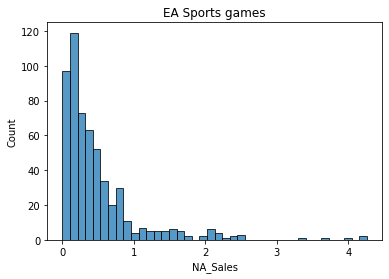

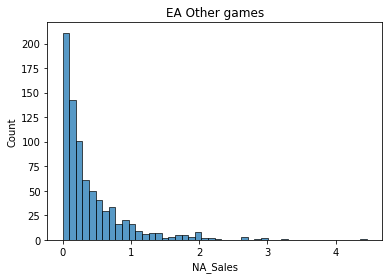

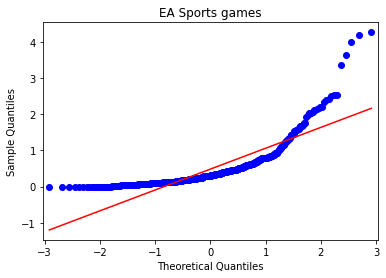

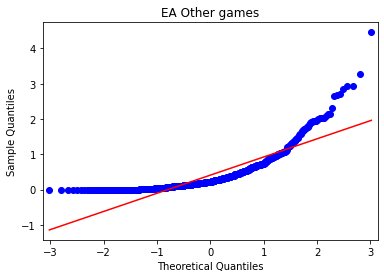

DescribeResult(nobs=561, minmax=(0.0, 4.26), mean=0.48176470588235293, variance=0.3320259873949579, skewness=2.972437867051901, kurtosis=11.869679638534157)
DescribeResult(nobs=790, minmax=(0.0, 4.46), mean=0.41113924050632905, variance=0.26463266753300924, skewness=2.6291700808486937, kurtosis=9.825498813574452)


<IPython.core.display.Javascript object>

In [10]:
sns.histplot(ea_sport["NA_Sales"])
plt.title("EA Sports games")
plt.show()
sns.histplot(ea_other["NA_Sales"])
plt.title("EA Other games")
plt.show()

sm.qqplot(ea_sport["NA_Sales"], line="s")
plt.title("EA Sports games")
plt.show()

sm.qqplot(ea_other["NA_Sales"], line="s")
plt.title("EA Other games")
plt.show()


print(stats.describe(ea_sport["NA_Sales"]))
print(stats.describe(ea_other["NA_Sales"]))

The data is not normal enought to continue with a t-test.

The distributions have a similar skew (shape).
We will continue with the Kruskal Wallis test.

In [11]:
test_stat, p = stats.kruskal(ea_sport["NA_Sales"], ea_other["NA_Sales"])
print("H: " + str(test_stat))
print("P: " + str(p))
print(p < 0.05)

H: 15.174720115703758
P: 9.800674938656055e-05
True


<IPython.core.display.Javascript object>

The H value is high and p value is less than 0.05 so there is a difference in medians between datasets.

Now we will use boostrap resampling to to create a 95% confidence interval from the resampled, normal distribution. 

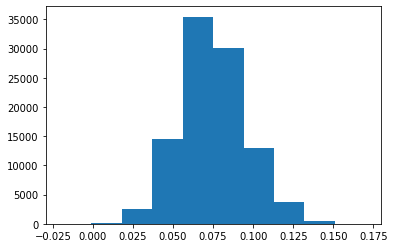

<IPython.core.display.Javascript object>

In [12]:
median_diffs = []
for i in range(100000):
    sample_1 = ea_sport["NA_Sales"].sample(frac=1.0, replace=True)
    sample_2 = ea_other["NA_Sales"].sample(frac=1.0, replace=True)

    median_diff = sample_1.median() - sample_2.median()
    median_diffs.append(median_diff)

plt.hist(median_diffs)
plt.show()

In [13]:
ci_lo = np.percentile(median_diffs, 2.5) * 1000000
ci_hi = np.percentile(median_diffs, 97.5) * 1000000
(ci_lo, ci_hi)

(34999.99999999998, 120000.00000000003)

<IPython.core.display.Javascript object>

EAs sports games sell 35,000 to 120,000 units more than non sport games across all gaming platforms.

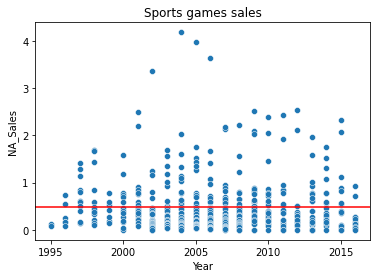

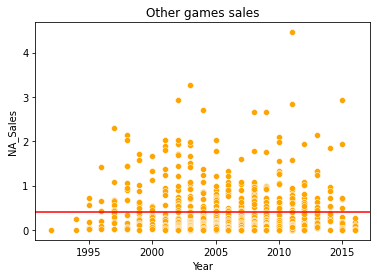

481764.70588235295
411139.24050632905


<IPython.core.display.Javascript object>

In [14]:
sns.scatterplot(data=ea_sport, x="Year", y="NA_Sales")
plt.axhline(ea_sport["NA_Sales"].mean(), label="2.5 Percentile", c="red")
plt.title("Sports games sales")
plt.show()
sns.scatterplot(data=ea_other, x="Year", y="NA_Sales", color="orange")
plt.axhline(ea_other["NA_Sales"].mean(), label="2.5 Percentile", c="red")
plt.title("Other games sales")
plt.show()
print(ea_sport.NA_Sales.mean() * 1000000)
print(ea_other.NA_Sales.mean() * 1000000)

# Comparing sales after 2009

In [15]:
ea_sport_modern = ea_sport[ea_sport["Year"] >= 2010]
ea_other_modern = ea_other[ea_other["Year"] >= 2010]

<IPython.core.display.Javascript object>

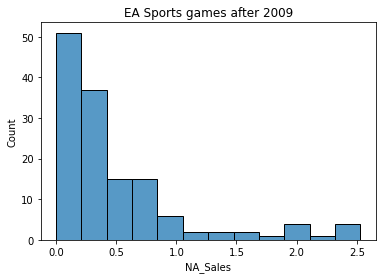

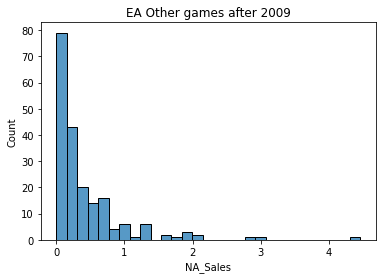

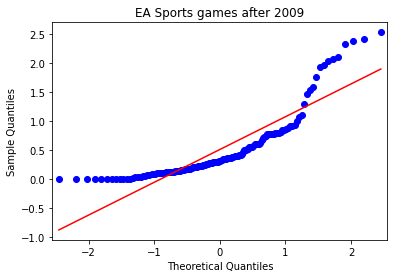

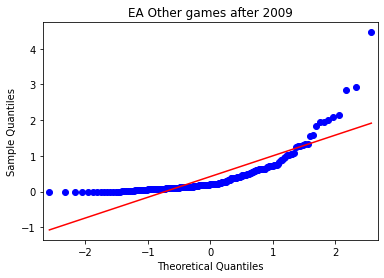

DescribeResult(nobs=140, minmax=(0.0, 2.53), mean=0.5117857142857143, variance=0.32101189619732784, skewness=1.8854183753919176, kurtosis=3.173813192009791)
DescribeResult(nobs=200, minmax=(0.0, 4.46), mean=0.4203, variance=0.33771347738693464, skewness=3.200220277762319, kurtosis=14.170678885454883)


<IPython.core.display.Javascript object>

In [16]:
sns.histplot(ea_sport_modern["NA_Sales"])
plt.title("EA Sports games after 2009")
plt.show()
sns.histplot(ea_other_modern["NA_Sales"])
plt.title("EA Other games after 2009")
plt.show()

sm.qqplot(ea_sport_modern["NA_Sales"], line="s")
plt.title("EA Sports games after 2009")
plt.show()

sm.qqplot(ea_other_modern["NA_Sales"], line="s")
plt.title("EA Other games after 2009")
plt.show()


print(stats.describe(ea_sport_modern["NA_Sales"]))
print(stats.describe(ea_other_modern["NA_Sales"]))

In [17]:
test_stat, p = stats.kruskal(ea_sport_modern["NA_Sales"], ea_other_modern["NA_Sales"])
print("H: " + str(test_stat))
print("P: " + str(p))
print(p < 0.05)

H: 6.031880430344221
P: 0.01404975803431551
True


<IPython.core.display.Javascript object>

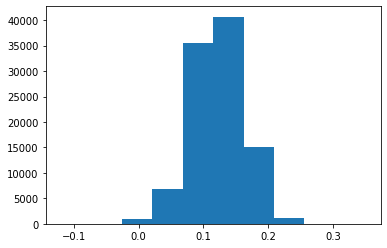

<IPython.core.display.Javascript object>

In [18]:
median_diffs = []
for i in range(100000):
    sample_1 = ea_sport_modern["NA_Sales"].sample(frac=1.0, replace=True)
    sample_2 = ea_other_modern["NA_Sales"].sample(frac=1.0, replace=True)

    median_diff = sample_1.median() - sample_2.median()
    median_diffs.append(median_diff)

plt.hist(median_diffs)
plt.show()

In [19]:
ci_lo = np.percentile(median_diffs, 2.5) * 1000000
ci_hi = np.percentile(median_diffs, 97.5) * 1000000
(ci_lo, ci_hi)

(44999.999999999985, 195000.0)

<IPython.core.display.Javascript object>

After the year 2009, EAs sports games sell roughly 45,000 to 195,000 units more than non sport games across all gaming platforms.

# Further considerations

* Gathering data from more recent years to analyze more modern game sales (games sales from 2017-2020).
* Getting sales amounts in dollars to see the most lucrative games as opposed to the games with the most copies sold.
* Further comparing the non-sport genres so further compare units sold by genre. 

# Below is visual support, scatter plot of sales by year and shows means.

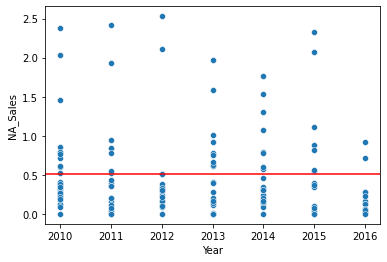

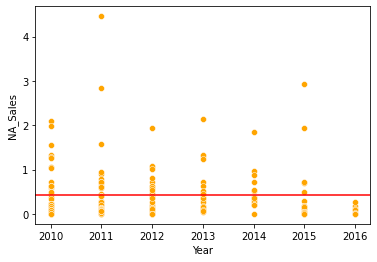

<IPython.core.display.Javascript object>

In [20]:
sns.scatterplot(data=ea_sport_modern, x="Year", y="NA_Sales")
plt.axhline(ea_sport_modern["NA_Sales"].mean(), label="2.5 Percentile", c="red")
plt.show()
sns.scatterplot(data=ea_other_modern, x="Year", y="NA_Sales", color="orange")
plt.axhline(ea_other_modern["NA_Sales"].mean(), label="2.5 Percentile", c="red")
plt.show()

In [21]:
print(ea_sport_modern.NA_Sales.mean() * 1000000)
print(ea_other_modern.NA_Sales.mean() * 1000000)

511785.71428571426
420300.0


<IPython.core.display.Javascript object>

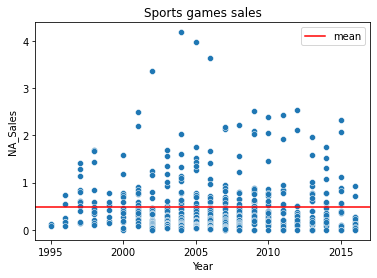

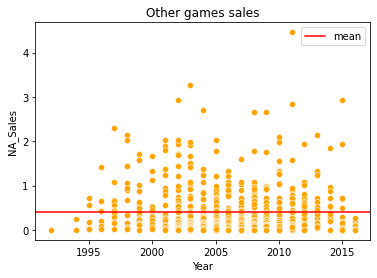

<IPython.core.display.Javascript object>

In [22]:
sns.scatterplot(data=ea_sport, x="Year", y="NA_Sales")
plt.axhline(ea_sport["NA_Sales"].mean(), label="mean", c="red")
plt.title("Sports games sales")
plt.legend()
plt.show()
sns.scatterplot(data=ea_other, x="Year", y="NA_Sales", color="orange")
plt.axhline(ea_other["NA_Sales"].mean(), label="mean", c="red")
plt.title("Other games sales")
plt.legend()
plt.show()

In [23]:
print(ea_sport.NA_Sales.max())
print(ea_other.NA_Sales.max())

4.26
4.46


<IPython.core.display.Javascript object>

In [24]:
ea[ea["NA_Sales"] == 4.26]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23


<IPython.core.display.Javascript object>

In [25]:
ea[ea["NA_Sales"] == 4.46]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34


<IPython.core.display.Javascript object>

# Creating new column for boxplot

In [26]:
def s_o_p(df):
    if df != "Sports":
        return "Other"
    else:
        return "Sports"

<IPython.core.display.Javascript object>

In [27]:
ea["Genres"] = ea["Genre"].apply(s_o_p)

c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

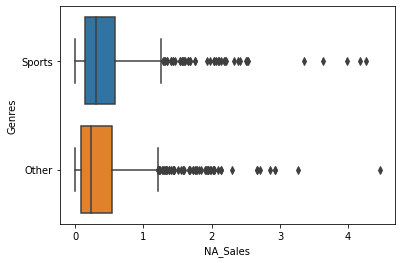

<IPython.core.display.Javascript object>

In [28]:
sns.boxplot(x="NA_Sales", y="Genres", data=ea)
plt.show()

# Printing presentation info 

In [29]:
ea.Genre.unique()

array(['Sports', 'Action', 'Simulation', 'Shooter', 'Racing',
       'Role-Playing', 'Misc', 'Strategy', 'Fighting', 'Puzzle',
       'Platform', 'Adventure'], dtype=object)

<IPython.core.display.Javascript object>

In [30]:
print(f"median ea sport sales: {ea_sport.NA_Sales.median()}")
print(f"median ea other sales: {ea_other.NA_Sales.median()}")
print(f"mean ea sports sales: {ea_sport.NA_Sales.mean()}")
print(f"mean ea other sales: {ea_other.NA_Sales.mean()}")
print(f"ea sports games count: {ea_sport.NA_Sales.count()}")
print(f"ea other games count:{ea_other.NA_Sales.count()}")

median ea sport sales: 0.3
median ea other sales: 0.23
mean ea sports sales: 0.48176470588235293
mean ea other sales: 0.41113924050632905
ea sports games count: 561
ea other games count:790


<IPython.core.display.Javascript object>

In [31]:
ea_other.groupby("Name").Global_Sales.sum().sort_values(ascending=False).tail(50)

Name
Auto Destruct                                         0.08
The Sims 3: Fast Lane Stuff                           0.08
Battlefield 2                                         0.08
Brain Quest: Grades 3 & 4                             0.07
Space Hulk: Vengeance of the Blood Angels             0.07
Viewpoint                                             0.07
The Sims 3: Barnacle Bay                              0.07
SimCity 4: Deluxe Edition                             0.07
The Sims 2: Seasons                                   0.07
The Sims 2: University                                0.06
Orcs & Elves                                          0.06
Desert Strike Advance                                 0.06
Dungeon Keeper 2                                      0.06
Crusader: No Remorse                                  0.05
Hi-Octane: The Track Fights Back!                     0.05
Disney's Party                                        0.05
Magic Carpet                                       

<IPython.core.display.Javascript object>

In [32]:
ea_sport.sort_values("NA_Sales", ascending=False).head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
238,239,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
211,212,Madden NFL 06,PS2,2005.0,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91
240,241,Madden NFL 07,PS2,2006.0,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49
279,280,Madden NFL 2003,PS2,2002.0,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14
506,507,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.16,0.00,0.17,2.86
516,517,Madden NFL 10,X360,2009.0,Sports,Electronic Arts,2.52,0.09,0.00,0.22,2.83
451,452,Madden NFL 2002,PS2,2001.0,Sports,Electronic Arts,2.50,0.16,0.01,0.42,3.08
555,556,Madden NFL 12,X360,2011.0,Sports,Electronic Arts,2.42,0.11,0.00,0.16,2.69
557,558,Madden NFL 11,X360,2010.0,Sports,Electronic Arts,2.38,0.12,0.00,0.18,2.69


<IPython.core.display.Javascript object>